# I.I.D.

How can one check if the data is i.i.d? Is it possible? How efficient it is?

* **TODO** Is there an optimal method for this test, analogous to the mutual information used for data independence test?

In [1]:
# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
base_dir = currentdir[:currentdir.index('python')] + 'python/'
sys.path.insert(0,base_dir) 
print("Appended base directory", base_dir)

# Import base libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Import local libraries
from lib.signal.filter import approx_LPF

Appended base directory /media/aleksejs/DataHDD/work/codes/snippets-data-analysis/python/


### Test 1: Asymptotic behaviour of sample mean and variance

If the data is IID, gradually sampling more data should result in sample mean and variance approacing their true values. 
* For **IID** process, both mean and variance converge quickly
* For **1-step Wiener** process, neither mean nor variance converges
* For **low-pass-filtered IID** data, both mean and variance converge, but very slowly
This is not true, for example, for a , where sample variance only grows when sampling more data

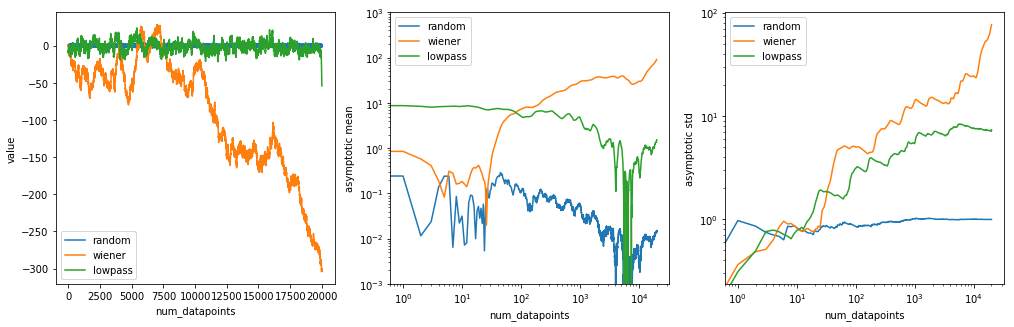

In [18]:
NDATA = 20000

fig, ax = plt.subplots(ncols = 3, figsize=(17,5))
ax[0].set_xlabel('num_datapoints')
ax[1].set_xlabel('num_datapoints')
ax[2].set_xlabel('num_datapoints')
ax[0].set_ylabel('value')
ax[1].set_ylabel('asymptotic mean')
ax[2].set_ylabel('asymptotic std')

labels = ['random', 'wiener', 'lowpass']
data = np.zeros((3, NDATA))
data[0] = np.random.normal(0, 1, NDATA)
data[1] = np.copy(data[0])
for i in range(1, NDATA):
    data[1,i] += data[1,i-1]
data[2] = approx_LPF(data[0], 100, 1) * 100

for iData in range(len(labels)):
    ax[0].plot(data[iData], label=labels[iData])
    ax[1].loglog([np.abs(np.average(data[iData,:i+1])) for i in range(NDATA)], label=labels[iData])
    ax[2].loglog([np.std(data[iData,:i+1]) for i in range(NDATA)], label=labels[iData])
    
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[1].set_ylim([1.0e-3, 1.0e+3])
plt.show()

# Test 2. Autocorrelation

Autocorrelation says how good is the point $x[i-n]$ as a linear predictor of the point $y[i]$ for some window $n$ and over all data indices $i$

**Observations**:
* For IID process autocorrelation is a delta function
* For Wiener process, autocorellation is significant everywhere - whatever delay you take, you have significant predictive power over the future of this process using a linear estimator
* For low-pass filtered process, predictive power is really high only within the decay timescale. However, there is weird periodic appearance of correlation of up to 0.2 over the whole autocorrelation range.

**Conclusions**: Autocorrelation and asymptotic moments are both vulnerable to type-1 errors, meaning that they would reject $H_0$ (that the underlying process is time-independent) while it is actually true.

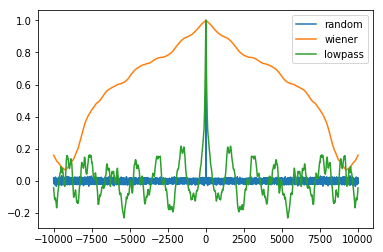

In [19]:
def cross_corr(x, y, n):
    if n > 0:
        return np.corrcoef(x[n:], y[:-n])[0, 1]
    elif n < 0:
        return cross_corr(y, x, -n)
    else:
        return np.corrcoef(x, y)[0, 1]

window = 10000
windowArr = np.arange(-window, window+1, 1)
    
plt.figure()
for iData in range(3):
    dataAuto = [cross_corr(data[iData], data[iData], i) for i in windowArr]
    plt.plot(windowArr, dataAuto, label=labels[iData])
    
plt.legend()
plt.show()

# Test 2.1 Power spectrum

Power spectrum is the Fourier-transform of the autocorrelation function.

<table>
    <tr>
        <td>Truncated Fourier Transform</td>
        <td>$\hat{x}(\omega) = \frac{1}{\sqrt{T}}\int_0^T x(t)e^{i\omega t} dt$</td>
    </tr>
    <tr>
        <td>Truncated Autocorrelation Function</td>
        <td>$A(\tau) = \bigl \langle \int_{\tau - T}^{\tau} x(t)x^*(\tau - t) dt \bigr \rangle$</td>
    </tr>
    <tr>
        <td>Truncated Power Spectrum Density</td>
        <td>
            $\begin{eqnarray}
              S_{xx}(\omega) &=& \langle |f(\omega)|^2 \rangle \\
              &=& \langle f(\omega)f^*(\omega) \rangle \\
              &=& \langle \frac{1}{T}\int_0^T f(t)e^{i\omega t}dt \int_0^T f(t')e^{-i\omega t'}dt' \rangle \\
              &=& \frac{1}{T}\int_0^T \int_0^T \langle f(t) f^*(t') \rangle e^{i\omega (t-t')}dt dt' \\
              &=& \frac{1}{T}\int_0^T \int_{-t'}^{T-t'} \langle f(t'+\tau) f^*(t') \rangle e^{i\omega \tau}d\tau dt' \\
            \end{eqnarray}$        
        </td>
    </tr>
</table>







* **[TODO]** What is it good for?
* **[TODO]** How does it help to understand temporal interdependence of data?
* **[TODO]** Why autocorrelation of lowpass looks periodic. Can it explain it?